# Kyber: Un Sistema Criptográfico Post-Cuántico

Kyber es un sistema criptográfico diseñado para proteger las comunicaciones incluso contra ataques de computadoras cuánticas. Se basa en matemáticas avanzadas, específicamente en **retículas**, y permite que dos partes establezcan una clave secreta de forma segura.

## Niveles de Seguridad de Kyber

Kyber ofrece diferentes niveles de seguridad, ajustando un parámetro llamado `k`:

- **Kyber512**: 128 bits de seguridad
- **Kyber768**: 192 bits de seguridad
- **Kyber1024**: 256 bits de seguridad

Lo innovador de Kyber es que, en lugar de cambiar varios parámetros matemáticos, simplemente ajusta el valor de `k` para mejorar la seguridad. Esto hace que sus cálculos sean más eficientes y reutilizables.

---

## 1. (Re)introducción a los Polinomios

Kyber utiliza polinomios en sus cálculos. Un polinomio es una expresión matemática con términos como:

$$
P(X) = 5X^3 + 2X^2 + X + 7
$$

Este polinomio se puede representar como una lista de coeficientes:

$$
P(X) = [7, 1, 2, 5]
$$

### Operaciones con Polinomios

Kyber necesita realizar varias operaciones con polinomios, como **suma**, **resta** y **multiplicación**. A continuación, se explican estas operaciones con ejemplos.

---

## 2. Campos y Anillos: Estructuras Matemáticas de Kyber

Para que los cálculos sean eficientes y seguros, Kyber utiliza dos estructuras matemáticas:

1. **Campos Finitos**: Trabajan con números en un rango limitado usando módulo $ q $.
2. **Anillos Polinomiales**: Limitan los polinomios mediante módulo $ X^n + 1 $.

### Ejemplo de un Campo Finito

Supongamos que usamos el número primo \( q = 7 \). Esto significa que cualquier número mayor a 7 se "reduce" con el módulo 7.

- Si tenemos el número 9:
  $$
  9 \mod 7 = 2
  $$

- Si tenemos -3:
  $$
  -3 \mod 7 = 4
  $$

Esto asegura que todos los números estén en el rango de 0 a 6.

### Ejemplo de un Anillo Polinomial

Si definimos el anillo con $ X^4 + 1 = 0 $, significa que cualquier $ X^4$ en un cálculo se puede reemplazar por $-1$.

Por ejemplo:

$$
P(X) = X^4 + 3X^2 + 2
$$

Como $ X^4 = -1 $, podemos reescribir:

$$
P(X) = -1 + 3X^2 + 2
$$
$$
P(X) = 3X^2 + 1
$$

Esto reduce el tamaño de los cálculos y mejora la eficiencia de Kyber.

---

## 3. Operaciones con Polinomios

Kyber necesita realizar **suma**, **resta** y **multiplicación** con polinomios dentro del campo finito. A continuación, se muestran ejemplos de cómo funcionan estas operaciones.

### Suma de Polinomios

La suma de polinomios se realiza sumando sus coeficientes, asegurándose de aplicar el módulo $q$.

**Ejemplo:**

Sumemos los siguientes polinomios en $ \mathbb{Z}_7 $:

$$
P(X) = [3, 2, 1]
$$
$$
Q(X) = [4, 1, 0]
$$

Hacemos la suma coeficiente por coeficiente:

$$
(3 + 4, 2 + 1, 1 + 0) = [7, 3, 1]
$$

Ahora aplicamos el módulo 7:

$$
7 \mod 7 = 0
$$

Resultado final:

$$
[0, 3, 1]
$$

### Resta de Polinomios

La resta se realiza restando coeficientes y aplicando módulo $ q$.

**Ejemplo:**

Restemos los mismos polinomios:

$$
P(X) = [3, 2, 1]
$$
$$
Q(X) = [4, 1, 0]
$$

$$
(3 - 4, 2 - 1, 1 - 0) = [-1, 1, 1]
$$

Aplicamos módulo 7 para eliminar negativos:

$$
-1 \mod 7 = 6
$$

Resultado final:

$$
[6, 1, 1]
$$

### Multiplicación de Polinomios

La multiplicación se realiza normalmente y luego se aplica el módulo $ X^n + 1 $.

**Ejemplo:**

Multipliquemos los polinomios en $\mathbb{Z}_7$ bajo el anillo $ X^3 + 1 = 0 $:

$$
P(X) = X + 2
$$
$$
Q(X) = X^2 + 3X + 1
$$

Multiplicamos:

$$
(X + 2)(X^2 + 3X + 1) = X^3 + 3X^2 + X + 2X^2 + 6X + 2
$$

Agrupamos términos:

$$
X^3 + 5X^2 + 7X + 2
$$

Ahora aplicamos módulo $ X^3 + 1 = 0 $, lo que significa que podemos sustituir $ X^3 = -1 $:

$$
-1 + 5X^2 + 7X + 2
$$

Como $ 7X \equiv 0X \mod 7 $, eliminamos ese término y simplificamos:

$$
1 + 5X^2
$$

Resultado final:

$$
1 + 5X^2
$$


In [ ]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial

import random

In [ ]:

# Funciones de operaciones con polinomios
def add_poly(a, b, q):
    result = [0] * max(len(a), len(b))
    for i in range(max(len(a), len(b))):
        if i < len(a):
            result[i] += a[i]
        if i < len(b):
            result[i] += b[i]
        result[i] %= q
    return result

# inverso aditivo de un polinomio
def inv_poly(a, q):
  return list(map(lambda x: -x % q, a))

# resta de un polinomio

def sub_poly(a, b, q):
  return add_poly(a, inv_poly(b, q), q)# suma de  un polinomio y el inverso aditivo del otro , es decir su número negativo
# multiplicación modulo q y reducido a f = X**n + 1

def mul_poly_simple(a, b, f, q):
    degree_f = len(f) - 1
    tmp = [0] * (2 * degree_f)

    for i in range(len(a)):
        for j in range(len(b)):
            if i + j < len(tmp):
                tmp[i + j] = (tmp[i + j] + a[i] * b[j]) % q

    result = tmp[:degree_f]
    for i in range(degree_f, len(tmp)):
        if i < len(tmp) and i - degree_f < len(result):
            index = i - degree_f
            result[index] = (result[index] - tmp[i]) % q

    return result

In [ ]:
np.random.seed(0xdeadbeef)

def sign_extend(poly, degree):
  if len(poly) >= degree:
    return poly

  return [0] * (degree - len(poly))

def test_mul_poly(N, f, q):
  degree_f = len(f) - 1

  for i in range(N):
    a = (np.random.random(degree_f) * q).astype(int)
    b = (np.random.random(degree_f) * q).astype(int)

    a_mul_b = mul_poly_simple(a, b, f, q)

    # NumPy reference poly multiplication
    # note that we need to convert the coefficients to int and extend the list to match the fixed size of our impl
    a_mul_b_ref = list(map(lambda x: int(x) % q, ((Polynomial(a) * Polynomial(b)) % Polynomial(f)).coef))
    a_mul_b_ref = sign_extend(a_mul_b_ref, degree_f)

    assert(a_mul_b == a_mul_b_ref)

test_mul_poly(100, [1, 0, 0, 0, 1], 17)


In [ ]:
def add_vec(v0, v1, q):
    assert(len(v0) == len(v1))
    result = []
    for i in range(len(v0)):
        result.append(add_poly(v0[i], v1[i], q))
    return result


def mul_vec_simple(v0, v1, f, q):
    assert(len(v0) == len(v1))
    degree_f = len(f) - 1
    result = [0 for _ in range(degree_f)]
    for i in range(len(v0)):
        result = add_poly(result, mul_poly_simple(v0[i], v1[i], f, q), q)
    return result


def mul_mat_vec_simple(m, a, f, q):
    result = []
    for i in range(len(m)):
        result.append(mul_vec_simple(m[i], a, f, q))
    return result



def transpose(m):
    if len(m) == 0 or len(m[0]) == 0:
        return []
    result = [[None for _ in range(len(m))] for _ in range(len(m[0]))]
    for i in range(len(m)):
        for j in range(len(m[0])):
            result[j][i] = m[i][j]
    return result

In [ ]:
np.random.seed(0xdeadbeef)
def sign_extend(poly, degree):
  if len(poly) >= degree:
    return poly

  return [0] * (degree - len(poly))

def test_mul_vec(N, k, f, q):
  degree_f = len(f) - 1

  for i in range(N):
    m = (np.random.random([k, k, degree_f]) * q).astype(int)
    a = (np.random.random([k, degree_f]) * q).astype(int)

    m_mul_a = mul_mat_vec_simple(m, a, f, q)

    m_poly = list(map(lambda x: list(map(Polynomial, x)), m))
    a_poly = list(map(Polynomial, a))
    prod = np.dot(m_poly, a_poly)
    m_mul_a_ref = list(map(lambda x: list(map(lambda y: int(y) % q, sign_extend((x % Polynomial(f)).coef, degree_f))), prod))

    assert(m_mul_a == m_mul_a_ref)

test_mul_vec(100, 2, [1, 0, 0, 0, 1], 17)

2. Cifrado de clave pública interno de Kyber
Ahora que hemos definido todos los primitivos subyacentes que necesitamos, ¡podemos avanzar para implementar el primitivo PKE subyacente de Kyber!

# Generación de una matriz $ A $

*   List item
*   List item

Primero, se toma una matriz $ A $ de dimensión $ a \times a $, es decir, una matriz cuadrada de tamaño $ a $. Esta matriz se genera de manera aleatoria y sus elementos son números que pertenecen a un cuerpo finito o un anillo de polinomios.

**Cuerpo finito o anillo de polinomios:** En este tipo de criptografía, se realizan operaciones aritméticas como suma, multiplicación y reducción (es decir, las operaciones se hacen dentro de un conjunto de números "limitado", como los números módulo un número primo o dentro de un anillo de polinomios).

# Generación de los vectores $ s $ y $ m $

Se generan dos vectores $ s $ y $ m $ (denominados generalmente "secreto" y "mensaje") que también son representaciones de polinomios. Estos vectores tienen un tamaño específico y los coeficientes de los polinomios en estos vectores son pequeños. Este detalle es importante porque garantiza que los coeficientes no sean demasiado grandes, lo cual tiene implicaciones para la eficiencia y seguridad del esquema.

- $ s $: Es el vector secreto. Este vector se utiliza para realizar las operaciones de cifrado y descifrado, y se mantiene secreto.
- $ m $: Es el vector mensaje. En el contexto de la generación de claves, este vector generalmente no se utiliza directamente para transmitir el mensaje, sino como parte de la creación de la clave pública.

# Multiplicación y suma: $ A \cdot s + m $

Luego, realizamos una multiplicación entre la matriz $ A $ y el vector secreto $ s $, lo que genera un nuevo vector. Esto se hace de manera similar a una multiplicación de matrices en álgebra lineal.

El resultado de $ A \cdot s $ es un vector nuevo. Después, se le suma el vector $ m $, que representa el mensaje. La expresión completa es:

$$
a = A * s + m
$$

Aquí:

- $ a $ es el vector resultante de la clave pública, que es lo que se comparte con los demás para el cifrado.
- $ A * s $ es el resultado de la multiplicación de la matriz $ A $ con el vector secreto $ s $, lo que genera un nuevo vector "secreto".
- $ m $ se suma a este resultado para dar un vector $ a $, que es la clave pública.

# Clave pública y clave secreta

- **Clave pública:** El vector $ a $ es la clave pública. Esta es la que se puede compartir públicamente con cualquier persona que quiera cifrar un mensaje. Cualquiera que tenga acceso a la clave pública puede cifrar mensajes, pero no puede descifrarlos sin la clave secreta.

- **Clave secreta:** El vector $ s $ es la clave secreta. Solo el propietario de esta clave la tiene y la usa para descifrar los mensajes cifrados con la clave pública.


# Dificultad del Problema M-LWE

El problema de Learning With Errors (LWE) y su variante Module Learning With Errors (M-LWE) se basa en la dificultad de resolver sistemas de ecuaciones lineales con errores. Para entender por qué es computacionalmente difícil, examinemos algunos aspectos clave:

## Estructura del Problema

El problema M-LWE se puede formular como:

Dados:

- Una matriz $ A $ de dimensión $ n \times m $.
- Un vector de salida $ a $ que se calcula como $ a = A \cdot s + m + e $, donde $ s $ es el vector secreto y $ e $ es un vector de ruido aleatorio.

El objetivo es recuperar $ s $ dado $ A $ y $ a $.

## Ruido y Enmascaramiento de la Información

La presencia del vector de ruido $ e $ complica la recuperación de $ s $:

- **Efecto del Ruido**: Si $ e $ tiene componentes pequeños (es decir, los elementos de $ e $ están limitados en magnitud), entonces puede ser visto como un "error" que distorsiona la solución exacta de la ecuación $ A \cdot s = a - m $. Sin embargo, $ e $ es suficientemente grande para que la solución no sea trivial de calcular.

## Complejidad Computacional

### a. Algoritmos Clásicos

Para resolver M-LWE, un atacante podría intentar diferentes enfoques:

- **Búsqueda Exhaustiva**: Probar todos los posibles vectores $ s $ para ver cuál satisface la ecuación. Sin embargo, el número de posibles vectores crece exponencialmente con la dimensión del espacio. Si $ s $ es de dimensión $ n $ y cada elemento puede tomar $ q $ valores (en un campo de tamaño $ q $), el número total de posibles $ s $ es $ q^n $.

  Total de posibles $ s = q^n $

- **Reducción a Problemas Conocidos**: Algunos algoritmos intentan reducir el problema M-LWE a otros problemas como el problema de la reducción de redes, pero estos enfoques también son computacionalmente intensivos.

### b. Algoritmos Cuánticos

- **Complejidad de Resolución Cuántica**: Aunque las computadoras cuánticas pueden ejecutar algoritmos como el algoritmo de Grover, que permite buscar en un espacio no estructurado en tiempo $ O(N) $, aún se necesita un número exponencial de recursos para resolver problemas de M-LWE en instancias prácticas.


# Proceso de Encripción en Kyber

## 1. Entradas necesarias
- **Clave pública:** Un par $(A,a)$, donde:
  - $A$ es una matriz de polinomios.
  - $a$ es un vector de polinomios.
- **Mensaje:** Un mensaje binario $m$. Por ejemplo,
  - $m = 11 = (1011)_2$.

### Parámetros del sistema:
- $q$: Tamaño del campo finito (por ejemplo, $q = 17$).
- $\left\lfloor \frac{q}{2} \right\rfloor$: Factor de escalado (por ejemplo, $9$ para $q = 17$).

## 2. Codificación del mensaje
El mensaje binario $m$ se convierte en un polinomio binario $m_b$. Por ejemplo:

Si $m = 11 = (1011)_2$, entonces:

$$
m_b = x^3 + x + 1
$$

(Aquí, los coeficientes del polinomio representan los bits del mensaje).

Luego, este polinomio se escala multiplicándolo por $\left\lfloor \frac{q}{2} \right\rfloor$:

$$
\left\lfloor \frac{q}{2} \right\rfloor m_b = 9 \cdot (x^3 + x + 1) = 9x^3 + 9x + 9
$$

## 3. Generación de elementos aleatorios
Para el cifrado, se generan los siguientes elementos aleatorios con coeficientes pequeños:

- **Vector cegador** $(a)$: Un vector de polinomios. Por ejemplo:

$$
a = [a_1, a_2] = [x + 1, 2x^2]
$$

- **Vector de error** $(e_1)$: Un vector de polinomios. Por ejemplo:

$$
e_1 = [e_{11}, e_{12}] = [x, x^2 + 1]
$$

- **Polinomio de error** $(e_2)$: Un polinomio. Por ejemplo:

$$
e_2 = x^2 + x
$$

## 4. Cálculo del texto cifrado
El texto cifrado consiste en dos componentes: un vector $u$ y un polinomio $v$.

### 4.1. Cálculo de $u$

$$
u = A^T a + e_1
$$

- $A^T$ es la transpuesta de la matriz $A$.
- $a$ es el vector cegador.
- $e_1$ es el vector de error.


In [ ]:
def encrypt(A, t, m_b, f, q, r, e_1, e_2):
  half_q = int(q / 2 + 0.5)
  m = list(map(lambda x: x * half_q, m_b))

  u = add_vec(mul_mat_vec_simple(transpose(A), r, f, q), e_1, q)
  v = sub_poly(add_poly(mul_vec_simple(t, r, f, q), e_2, q), m, q)

  return u, v

# Descifrado

Tras recibir el texto cifrado, podemos ver cómo descifrarlo y recuperar el mensaje original.

Kyber define el descifrado PKE interno de la siguiente manera:

![Descripción de la imagen](https://github.com/macaluzate/cripto-proyecto/blob/main/public/dec.png?raw=1)

Podemos ver que los términos de ruido restantes $mi \cdot a, mi_2, s \cdot mi_1$ son todos relativamente pequeños porque se muestrean con “coeficientes pequeños”. Y, por otro lado, $\left\lfloor \frac{q}{2} \right\rfloor m_b$ es relativamente grande ya que se está escalando para tener una amplitud de la mitad del tamaño del campo $q$.

Por lo tanto, para recuperar $m_b$ de $mensaje$, simplemente realizamos una operación de “redondeo” y vemos si cada coeficiente en $mensaje$ está más cerca de $\left\lfloor \frac{q}{2} \right\rfloor m_b$ o 0. Finalmente, los resultados de la comparación generan un vector booleano que debería coincidir con el inicial $m_b$.

De manera similar, implementamos el descifrado mediante el cálculo $mensaje$ y realizar manualmente la operación circular.


In [ ]:
def decrypt(s, u, v, f, q):
  m_n = sub_poly(v, mul_vec_simple(s, u, f, q), q)

  half_q = int(q / 2 + 0.5)
  def round(val, center, bound):
    dist_center = np.abs(center - val)
    dist_bound = min(val, bound - val)
    return center if dist_center < dist_bound else 0

  m_n = list(map(lambda x: round(x, half_q, q), m_n))
  m_b = list(map(lambda x: x // half_q, m_n))

  return m_b

In [ ]:
import hashlib

# pasar de bits a ascii
def bits_to_ascii(bit_list):
    """Convierte una lista de bits (0s y 1s) en una cadena de texto ASCII."""
    text = ""

    if len(bit_list) % 8 != 0:
        print("Advertencia: La lista de bits no es un múltiplo de 8. Se truncará.")
        bit_list = bit_list[: (len(bit_list) // 8) * 8]  # Truncar a un múltiplo de 8


    for i in range(0, len(bit_list), 8):
        byte = bit_list[i:i+8]  # Tomar  grupo de 8 bits es decir 1 byte

        byte_str = "".join(map(str, byte))

        try:
            char_code = int(byte_str, 2)  # Convertir a entero (base 2)
        except ValueError:
            print(f"Error: No se pudo convertir el byte '{byte_str}' a un entero.")
            return ""

        # Convertir el entero en un carácter ASCII
        try:
            char = chr(char_code)
            text += char
        except ValueError:
            print(f"Error: El código ASCII '{char_code}' está fuera de rango.")
            return ""

    return text

def compress(poly, q, bits):
    """Comprime un polinomio a un número específico de bits por coeficiente""" ##
    scale = 2**bits / q
    return [(int(x * scale) % 2**bits) for x in poly]

def decompress(poly, q, bits):
    """Descomprime un polinomio comprimido"""
    scale = q / 2**bits
    return [(int(x * scale) % q) for x in poly]

# Distribución de error binomial centrada se usa comunmente en kyber por que sus errores son pequeños
def sample_cbd(eta, seed=None):
    """Muestrea de una distribución binomial centrada con parámetro eta"""
    if seed is not None:
        random.seed(seed)
    return sum(random.randint(0, 1) for _ in range(eta)) - sum(random.randint(0, 1) for _ in range(eta))

# Función para convertir texto a semilla
def text_to_seed(text):
    """Convierte texto a semilla numérica usando SHA-256"""
    hash_object = hashlib.sha256(text.encode())
    hash_hex = hash_object.hexdigest()
    return int(hash_hex, 16)

# Función para generar matriz A pseudoaleatoria
def gen_matrix_A(seed, k, degree_f, q):
    """Genera matriz A determinística a partir de una semilla"""
    random.seed(seed)
    A = []  # Corregido: Usar una lista en vez de numpy para consistencia
    for i in range(k):
        row = []
        for j in range(k):
            row.append([random.randint(0, q-1) for _ in range(degree_f)])
        A.append(row)
    return A

Test


Diferencia de éxito al compartir llaves con diferentes valores de q

In [ ]:
np.random.seed(0xdeadbeef)

def test_enc_dec(N, k, f, q):
  degree_f = len(f) - 1

  A = (np.random.random([k, k, degree_f]) * q).astype(int)
  s = (np.random.random([k, degree_f]) * 3).astype(int) - 1
  e = (np.random.random([k, degree_f]) * 3).astype(int) - 1
  t = add_vec(mul_mat_vec_simple(A, s, f, q), e, q)

  failed = 0

  for i in range(N):
    m_b = (np.random.random(degree_f) * 2).astype(int)


    r = (np.random.random([k, degree_f]) * 3).astype(int) - 1
    e_1 = (np.random.random([k, degree_f]) * 3).astype(int) - 1
    e_2 = (np.random.random([degree_f]) * 3).astype(int) - 1

    u, v = encrypt(A, t, m_b, f, q, r, e_1, e_2)
    m_b2 = decrypt(s, u, v, f, q)

    if m_b.tolist() != m_b2:
      failed += 1

  print(f"[k={k}, f={f}, q={q}] Test result: {failed}/{N} failed decryption!")

test_enc_dec(1000, 2, [1, 1, 0, 0, 1], 17)
test_enc_dec(1000, 2, [1, 0, 0, 0, 1], 37)
test_enc_dec(1000, 2, [1, 0, 0, 0, 1], 67)

[k=2, f=[1, 1, 0, 0, 1], q=17] Test result: 286/1000 failed decryption!
[k=2, f=[1, 0, 0, 0, 1], q=37] Test result: 3/1000 failed decryption!
[k=2, f=[1, 0, 0, 0, 1], q=67] Test result: 0/1000 failed decryption!


**Detalles de las Clases:**

*   **`KyberAlice`:**
    *   `__init__(...)`: Inicializa los parámetros de Kyber, genera la matriz `A` y llama a `generate_keys()`.
    *   `generate_keys()`: Genera el par de claves pública/privada de Alice.
        *   Clave privada: vector secreto `s` (muestreado de la CBD).
        *   Vector de error `e` (muestreado de la CBD).
        *   Clave pública: `t = A*s + e` (la operación central de LWE).  La clave pública es la tupla `(seed, t)`.
    *   `get_public_key()`: Devuelve la clave pública.
    *   `decrypt_and_compute_key(...)`: Recibe el cifrado de Bob, lo desencripta y calcula la clave compartida.  Realiza `v - s^T * u`, decodifica el resultado a bits y aplica SHA-256 para obtener la clave final.



In [ ]:
class KyberAlice:
    def __init__(self, seed=None, k=2, degree_f=4, q=3329, eta1=3, eta2=2):
        self.k = k
        self.degree_f = degree_f
        self.q = q
        self.f = [1] + [0] * (degree_f-1) + [1]  # Corregido: Polinomio x^degree_f + 1
        self.eta1 = eta1
        self.eta2 = eta2
        self.seed = seed if seed else random.randint(0, 2**32-1)

        # Generar matriz A pseudoaleatoria
        self.A = gen_matrix_A(self.seed, k, degree_f, q)

        # Generar claves
        self.generate_keys()

    def generate_keys(self):
        """Genera par de claves pública y privada"""
        # Generar vector secreto s
        random.seed(self.seed + 1)  # Diferente semilla para s
        self.s = []
        for _ in range(self.k):
            self.s.append([sample_cbd(self.eta1) for _ in range(self.degree_f)])


        random.seed(self.seed + 2)  # Diferente semilla para e
        self.e = []
        for _ in range(self.k):
            self.e.append([sample_cbd(self.eta2) for _ in range(self.degree_f)])

        # Calcular la clave pública t = A*s + e
        self.t = add_vec(mul_mat_vec_simple(self.A, self.s, self.f, self.q), self.e, self.q)

        # Clave pública es (seed para generar A, t)
        self.public_key = (self.seed, self.t) # tupla Matriz aleatoría y  T
        # Clave privada es s
        self.private_key = self.s

    def get_public_key(self):
        """Devuelve la clave pública"""
        return self.public_key

    def decrypt_and_compute_key(self, ciphertext, compression_bits=8):
        """Desencripta el cifrado de Bob y calcula clave compartida"""
        u_compressed, v_compressed = ciphertext

        # Descomprimir u y v
        u = [decompress(poly, self.q, compression_bits) for poly in u_compressed]
        v = decompress(v_compressed, self.q, compression_bits)

        # Calcular v - s^T * u
        shared_poly = sub_poly(v, mul_vec_simple(self.s, u, self.f, self.q), self.q)

        # Decodificar a bits
        half_q = self.q // 2
        shared_key_bits = []
        for val in shared_poly:
            # Normalizar a [0, q-1]
            val = val % self.q
            # Determinar si es 0 o 1
            if val > self.q//4 and val < 3*self.q//4:
                shared_key_bits.append(1)
            else:
                shared_key_bits.append(0)

        # Convertir bits a bytes y luego hashear para obtener clave final
        shared_key_bytes = bytearray()
        for i in range(0, len(shared_key_bits), 8):
            if i + 8 <= len(shared_key_bits):
                byte_val = sum([bit << (7-j) for j, bit in enumerate(shared_key_bits[i:i+8])])
                shared_key_bytes.append(byte_val)

        # Aplicar hash a la clave compartida para obtener clave final
        final_key = hashlib.sha256(shared_key_bytes).hexdigest()
        return final_key, shared_key_bits

# Clase para Bob en el intercambio de claves


*   **`KyberBob`:**
    *   `__init__(...)`: Inicializa los parámetros de Kyber.
    *   `encrypt_and_compute_key(...)`: Recibe la clave pública de Alice, genera/codifica un mensaje, lo encripta y calcula la clave compartida.
        *   Regenera la matriz `A` usando la semilla de Alice.
        *   Genera un vector aleatorio `r` y vectores de error `e1`, `e2`.
        *   Codifica el mensaje:  bit 0 -> 0, bit 1 -> `q // 2`.
        *   Calcula `u = A^T * r + e1` y `v = t^T * r + e2 + m`.
        *   Comprime `u` y `v`.
        *   Calcula la clave compartida aplicando SHA-256 al mensaje *antes* de la codificación.

In [ ]:
# Clase para Bob en el intercambio de claves
class KyberBob:
    def __init__(self, k=2, degree_f=4, q=3329, eta1=3, eta2=2, seed=None):
        self.k = k
        self.degree_f = degree_f
        self.q = q
        self.f = [1] + [0] * (degree_f-1) + [1]  # Corregido: Polinomio x^degree_f + 1
        self.eta1 = eta1
        self.eta2 = eta2
        self.seed = seed if seed else random.randint(0, 2**32-1)

    def encrypt_and_compute_key(self, alice_public_key, message=None, compression_bits=8):
        """Encripta un mensaje aleatorio para Alice y calcula clave compartida"""
        # Desempaquetar clave pública de Alice
        a_seed, t = alice_public_key

        # Generar matriz A usando la semilla de Alice
        A = gen_matrix_A(a_seed, self.k, self.degree_f, self.q)


        random.seed(self.seed)  # semilla de Bob
        r = []
        for _ in range(self.k):
            r.append([sample_cbd(self.eta1) for _ in range(self.degree_f)])

        # Generar vectores de error e1, e2
        random.seed(self.seed + 1)  # Diferente semilla para e1
        e1 = []
        for _ in range(self.k):
            e1.append([sample_cbd(self.eta2) for _ in range(self.degree_f)])

        random.seed(self.seed + 2)  # Diferente semilla para e2
        e2 = [sample_cbd(self.eta2) for _ in range(self.degree_f)]

        #
        if message is None:
            random.seed(self.seed + 3)
            m_b = [random.randint(0, 1) for _ in range(self.degree_f)]
        else:
            # Convertir mensaje a bits
            m_bits = ''.join(format(ord(c), '08b') for c in message)
            # Tomar solo los primeros degree_f bits o rellenar si es necesario
            m_b = []
            for i in range(self.degree_f):
                if i < len(m_bits):
                    m_b.append(int(m_bits[i]))
                else:
                    m_b.append(0)

        # Codificar mensaje: 0 -> 0, 1 -> half_q
        half_q = self.q // 2
        m = [x * half_q for x in m_b]

        # Calcular u = A^T * r + e1
        A_t = transpose(A)
        u = add_vec(mul_mat_vec_simple(A_t, r, self.f, self.q), e1, self.q)

        # Calcular v = t^T * r + e2 + m
        v = add_poly(add_poly(mul_vec_simple(t, r, self.f, self.q), e2, self.q), m, self.q)

        # Comprimir u y v
        u_compressed = [compress(poly, self.q, compression_bits) for poly in u]
        v_compressed = compress(v, self.q, compression_bits)

        # El cifrado es (u, v)
        ciphertext = (u_compressed, v_compressed)

        # Calcular clave compartida a partir de m_b
        shared_key_bytes = bytearray()
        for i in range(0, len(m_b), 8):
            if i + 8 <= len(m_b):
                byte_val = sum([bit << (7-j) for j, bit in enumerate(m_b[i:i+8])])
                shared_key_bytes.append(byte_val)

        # Aplicar hash a la clave compartida para obtener clave final
        final_key = hashlib.sha256(shared_key_bytes).hexdigest()
        return ciphertext, final_key, m_b

Código para manejar las impreisones y visualización por consola

In [ ]:
import time
def print_header(title):
    """Imprime un encabezado con formato"""
    width = 80
    print("\n" + "=" * width)
    print(f"{title.center(width)}")
    print("=" * width)

def print_step(number, description):
    """Imprime un paso con formato"""
    print(f"\n[PASO {number}] {description}")
    print("-" * 80)

def print_waiting(text="Procesando"):
    """Imprime un mensaje de espera con animación"""
    for _ in range(3):
        for sym in ["|", "/", "-", "\\"]:
            print(f"\r{text} {sym}", end="", flush=True)
            time.sleep(0.1)
    print("\r" + " " * 50, end="\r")  # Limpiar la línea

def print_arrow(text="", direction="right", width=80, symbol="->"):
    """Imprime una flecha en la dirección especificada"""
    if direction == "right":
        arrow = " " * 5 + symbol + " " * 5
    else:  # left
        arrow = " " * 5 + symbol[::-1] + " " * 5

    text_space = width - len(arrow)
    if direction == "right":
        line = f"{text}{' ' * (text_space - len(text))}{arrow}"
    else:
        line = f"{arrow}{' ' * (text_space - len(text))}{text}"

    print(line)

def print_key_exchange_diagram():
    """Imprime un diagrama del intercambio de claves"""
    width = 80
    print("\n" + "=" * width)
    print("DIAGRAMA DEL INTERCAMBIO DE CLAVES KYBER".center(width))
    print("=" * width)

    print("\n" + " " * 10 + "Alice" + " " * 30 + "Bob")
    print(" " * 10 + "-----" + " " * 30 + "---")

    # Paso 1: Alice genera claves y envía la pública
    print("\n" + " " * 10 + "Genera par de claves")
    print(" " * 10 + "(pública y privada)")
    print_waiting()
    print_arrow("Envía clave pública", "right")

    # Paso 2: Bob recibe la clave pública y genera el cifrado
    print(" " * 50 + "Recibe clave pública")
    print(" " * 50 + "Genera vector r, errores")
    print(" " * 50 + "Encripta mensaje")
    print_waiting()
    print_arrow("Recibe cifrado (u,v)", "left")

    # Paso 3: Alice desencripta y ambos obtienen la misma clave
    print(" " * 10 + "Desencripta usando")
    print(" " * 10 + "clave privada (s)")
    print_waiting()

    # Resultado: Claves compartidas
    print("\n" + " " * 10 + "Clave compartida" + " " * 20 + "Clave compartida")
    print(" " * 10 + "K = H(v - s^T*u)" + " " * 17 + "K = H(m)")

    print("\n" + "=" * width)

def print_key_info(title, key_data, max_display=32):
    """Imprime información de clave con formato"""
    print(f"\n{title}:")
    print("-" * 80)

    if isinstance(key_data, tuple) and len(key_data) == 2:
        # Clave pública (seed, t)
        seed, t = key_data
        print(f"  Semilla para A: {seed}")
        print(f"  Vector t (compacto): [", end="")

        # Mostrar parte del vector t de forma compacta
        count = 0
        for i, poly in enumerate(t):
            if count < max_display:
                print(f"{poly[:2]}{'...' if len(poly) > 2 else ''}", end="")
                count += 2
                if i < len(t) - 1 and count < max_display:
                    print(", ", end="")
        print("]")

    elif isinstance(key_data, list) and all(isinstance(sublist, list) for sublist in key_data):
        # Clave privada (vector s)
        print(f"  Vector s (compacto): [", end="")

        # Mostrar parte del vector s de forma compacta
        count = 0
        for i, poly in enumerate(key_data):
            if count < max_display:
                print(f"{poly[:2]}{'...' if len(poly) > 2 else ''}", end="")
                count += 2
                if i < len(key_data) - 1 and count < max_display:
                    print(", ", end="")
        print("]")

    elif isinstance(key_data, str):
        # Clave compartida (hash)
        print(f"  {key_data[:64]}")
        if len(key_data) > 64:
            print(f"  {key_data[64:]}")

    else:
        print(f"  {key_data}")

def print_message_info(message, m_b):
    """Imprime información del mensaje con formato"""
    print("\nMensaje Secreto:")
    print("-" * 80)
    print(f"  Texto original: '{message}'")
    print(f"  Representación ASCII: {' '.join([format(ord(c), '08b') for c in message[:4]])}")
    print(f"  Bits utilizados (primeros 32): {m_b[:32]}")
    print(f"  Función del mensaje: Determina la clave compartida final")

def print_conclusion(match, shared_key):
    """Imprime una conclusión del intercambio"""
    print("\n" + "=" * 80)
    print("CONCLUSIÓN DEL INTERCAMBIO DE CLAVES".center(80))
    print("=" * 80)

    if match:
        print("\n✅ ¡ÉXITO! Alice y Bob han establecido una clave compartida segura.")
        print(f"\nClave compartida final: {shared_key}")

        print("\nExplicación:")
        print("  1. Alice generó un par de claves (pública y privada)")
        print("  2. Bob utilizó la clave pública de Alice para encriptar un mensaje aleatorio")
        print("  3. Bob calculó la clave compartida final utilizando el mensaje original")
        print("  4. Alice desencriptó el mensaje utilizando su clave privada")
        print("  5. Alice calculó la misma clave compartida a partir del mensaje recuperado")
        print("  6. Ambos obtuvieron la misma clave compartida, que pueden usar para cifrar")
        print("     comunicaciones futuras utilizando cifrado simétrico (AES, etc.)")
    else:
        print("\n❌ ¡ERROR! Las claves compartidas no coinciden.")
        print("\nPosibles causas:")
        print("  - Error en la implementación")
        print("  - Errores de redondeo acumulativos")
        print("  - Problemas con el manejo de los índices")

# Función para demostrar el intercambio de claves con visualización mejorada

## Implementación de Kyber
**Flujo del Intercambio de Claves:**

1.  **Alice:** Genera su par de claves (pública y privada) y envía la clave pública a Bob.
2.  **Bob:** Recibe la clave pública de Alice, genera un mensaje, lo encripta y calcula la clave compartida.  Envía el cifrado a Alice.
3.  **Alice:** Recibe el cifrado, lo desencripta y calcula la clave compartida.

Si todo funciona correctamente, Alice y Bob obtendrán la *misma* clave compartida, que podrán usar para comunicaciones seguras.

**Nota:** Este código *no* incluye funciones de análisis ni visualización.  Es solo la implementación básica de Kyber.

In [ ]:
import numpy as np
import hashlib
import random
import string
import time
def demonstrate_key_exchange(input_phrase=None):
    # Parámetros de Kyber
    k = 2
    degree_f = 256
    q = 3329
    eta1 = 3
    eta2 = 2

    # Generar semillas aleatorias para Alice y Bob
    alice_seed = random.randint(0, 2**32 - 1)
    bob_seed = random.randint(0, 2**32 - 1)


    print_header("DEMOSTRACIÓN DE INTERCAMBIO DE CLAVES KYBER")

    # Usar la frase de entrada como el mensaje secreto, si se proporciona
    if input_phrase:
        secret_message = input_phrase
        print(f"\nMensaje secreto: '{secret_message}'")
    else:
        # Si no hay frase, generar un mensaje aleatorio (para demostración)
        secret_message = ''.join(random.choice(string.ascii_letters + string.digits) for _ in range(16)) # Mensaje aleatorio de 16 caracteres
        print(f"\nMensaje secreto (generado aleatoriamente): '{secret_message}'")


    print_key_exchange_diagram()

    # Paso 1: Alice genera par de claves
    print_step(1, "Alice genera un par de claves")
    alice = KyberAlice(seed=alice_seed, k=k, degree_f=degree_f, q=q, eta1=eta1, eta2=eta2)
    alice_pk = alice.get_public_key()

    print("Alice ha generado su par de claves:")
    print_key_info("Clave Pública de Alice", alice_pk)
    print_key_info("Clave Privada de Alice", alice.private_key)

    # Paso 2: Bob recibe clave pública de Alice y genera clave compartida
    print_step(2, "Bob recibe la clave pública de Alice y genera el cifrado")
    bob = KyberBob(k=k, degree_f=degree_f, q=q, eta1=eta1, eta2=eta2, seed=bob_seed)



    #  core del asunto

    try:
        ciphertext, bob_shared_key, m_b = bob.encrypt_and_compute_key(alice_pk, secret_message)

        print("Bob ha generado un cifrado para enviar a Alice:")
        print_message_info(secret_message, m_b)

        # Mostrar cifrado de forma compacta
        print("\nCifrado generado:")
        print("-" * 80)
        u_preview = []
        for poly in ciphertext[0][:2]:
            u_preview.append(poly[:3])
        print(f"  Cifrado u (compacto): {u_preview}...")
        print(f"  Cifrado v (primeros valores): {ciphertext[1][:5]}...")

        print_key_info("Clave compartida de Bob", bob_shared_key)

        # Paso 3: Alice recibe el cifrado y calcula la misma clave compartida
        print_step(3, "Alice recibe el cifrado y calcula la misma clave compartida")
        alice_shared_key, recovered_bits = alice.decrypt_and_compute_key(ciphertext)

        print("Alice ha desencriptado el mensaje:")
        print(f"  Bits recuperados (primeros 32): {recovered_bits[:32]}")
        print(f"llave desencriptada sin sha 259  {bits_to_ascii(recovered_bits)}")

        print_key_info("Clave compartida de Alice", alice_shared_key)

        # Comparar las claves compartidas
        match = alice_shared_key == bob_shared_key
        print_conclusion(match, alice_shared_key)

        return match, alice_shared_key

    except Exception as e:
        print(f"\n❌ ¡Error durante el intercambio de claves!: {str(e)}")
        import traceback
        traceback.print_exc()
        return False, None

# Función para mostrar una explicación del funcionamiento
def show_kyber_explanation():
    print_header("CÓMO FUNCIONA KYBER - EXPLICACIÓN")

    print("\nKyber es un algoritmo de intercambio de claves post-cuántico que se basa en")
    print("el problema matemático de 'Learning With Errors' (LWE) en estructuras de retículos.")

    print("\nProceso en 3 pasos principales:")

    print("\n1. Generación de claves (Alice)")
    print("   - Alice genera una matriz pública A pseudoaleatoria")
    print("   - Genera un vector secreto 's' y un vector de error 'e'")
    print("   - Calcula su clave pública t = A·s + e")
    print("   - Envía la clave pública (semilla para generar A, t) a Bob")

    print("\n2. Encriptación (Bob)")
    print("   - Bob recibe la clave pública de Alice")
    print("   - Genera un vector aleatorio 'r' y vectores de error 'e1' y 'e2'")
    print("   - Codifica un mensaje secreto 'm' en un polinomio")
    print("   - Calcula u = A^T·r + e1")
    print("   - Calcula v = t^T·r + e2 + m·⌊q/2⌋")
    print("   - Envía el cifrado (u, v) a Alice")

    print("\n3. Desencriptación y generación de clave compartida (Alice)")
    print("   - Alice recibe el cifrado (u, v)")
    print("   - Calcula v - s^T·u ≈ m·⌊q/2⌋")
    print("   - Decodifica para obtener el mensaje 'm'")
    print("   - Ambos derivan la misma clave compartida a partir de 'm'")

    print("\nCaracterísticas importantes de Kyber:")
    print("   - Resistente a ataques con computadoras cuánticas")
    print("   - Basado en problemas matemáticos difíciles (LWE en retículos)")
    print("   - Usa estructuras algebráicas especiales (polinomios) para eficiencia")
    print("   - Emplea compresión para reducir el tamaño de comunicación")
    print("   - Finaliza con un hash SHA-256 para generar claves de alta entropía")

    print("\nUso del mensaje en el intercambio:")
    print("   - El mensaje 'm' funciona como un secreto aleatorio compartido")
    print("   - No transporta información útil por sí mismo")
    print("   - Su único propósito es derivar la clave compartida final")
    print("   - La clave compartida final se utiliza para cifrado simétrico")

# Interfaz de usuario mejorada
def main():
    print_header("INTERCAMBIO DE CLAVES KYBER - DEMOSTRACIÓN")

    print("\nBienvenido a la demostración del algoritmo de intercambio de claves Kyber,")
    print("un algoritmo post-cuántico basado en problemas de retículos matemáticos.")
    print("Esta implementación muestra los principios básicos del funcionamiento de Kyber.")

    while True:
        print("\nOpciones:")
        print("  1. Realizar intercambio de claves con mensaje secreto personalizado")
        print("  2. Realizar intercambio de claves con mensaje secreto aleatorio")
        print("  3. Mostrar explicación sobre cómo funciona Kyber")
        print("  4. Salir")

        choice = input("\nSeleccione una opción (1-4): ")

        if choice == '1':
            phrase = input("\nIngrese el mensaje secreto: ")
            demonstrate_key_exchange(phrase)  # Pasamos la frase directamente
        elif choice == '2':
            demonstrate_key_exchange()  # Sin argumentos, se genera un mensaje aleatorio
        elif choice == '3':
            show_kyber_explanation()
        elif choice == '4':
            break
        else:
            print("\n⚠️ Opción no válida. Por favor, seleccione una opción del 1 al 4.")

    print("\n¡Gracias por usar la demostración del intercambio de claves Kyber!")

if __name__ == "__main__":
    main()


                   INTERCAMBIO DE CLAVES KYBER - DEMOSTRACIÓN                   

Bienvenido a la demostración del algoritmo de intercambio de claves Kyber,
un algoritmo post-cuántico basado en problemas de retículos matemáticos.
Esta implementación muestra los principios básicos del funcionamiento de Kyber.

Opciones:
  1. Realizar intercambio de claves con mensaje secreto personalizado
  2. Realizar intercambio de claves con mensaje secreto aleatorio
  3. Mostrar explicación sobre cómo funciona Kyber
  4. Salir

                  DEMOSTRACIÓN DE INTERCAMBIO DE CLAVES KYBER                   

Mensaje secreto: 'oeoeoe'

                    DIAGRAMA DEL INTERCAMBIO DE CLAVES KYBER                    

          Alice                              Bob
          -----                              ---

          Genera par de claves
          (pública y privada)
Envía clave pública                                                      ->     
                                               

In [ ]:
pip install numpy matplotlib memory-profiler psutil

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Acer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import time
import matplotlib.pyplot as plt
from memory_profiler import profile
import psutil

# Función para medir el tiempo de ejecución
def measure_time(func, *args):
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

# Función para medir el uso de memoria
@profile
def measure_memory(func, *args):
    return func(*args)

# Función para medir el uso de CPU
def measure_cpu(func, *args):
    cpu_before = psutil.cpu_percent(interval=1)
    func(*args)
    cpu_after = psutil.cpu_percent(interval=1)
    return cpu_after - cpu_before

In [ ]:
# Generar polinomios aleatorios de diferentes grados
def generate_polynomials(degree, q):
    a = [i % q for i in range(degree)]  # Polinomio a
    b = [(i + 1) % q for i in range(degree)]  # Polinomio b
    f = [1] + [0] * (degree - 1) + [1]  # Polinomio f = X^degree + 1
    return a, b, f

# Grados de polinomios a probar
degrees = [10, 50, 100, 200, 500]
q = 17  # Módulo

In [ ]:
# Almacenar resultados
results_time = {"add_poly": [], "inv_poly": [], "sub_poly": [], "mul_poly_simple": []}
results_memory = {"add_poly": [], "inv_poly": [], "sub_poly": [], "mul_poly_simple": []}
results_cpu = {"add_poly": [], "inv_poly": [], "sub_poly": [], "mul_poly_simple": []}

# Evaluar el rendimiento para cada grado
for degree in degrees:
    a, b, f = generate_polynomials(degree, q)

    # Medir tiempo
    results_time["add_poly"].append(measure_time(add_poly, a, b, q))
    results_time["inv_poly"].append(measure_time(inv_poly, a, q))
    results_time["sub_poly"].append(measure_time(sub_poly, a, b, q))
    results_time["mul_poly_simple"].append(measure_time(mul_poly_simple, a, b, f, q))

    # Medir memoria (solo para una función representativa)
    if degree == degrees[0]:  # Medir memoria solo para el primer grado para evitar sobrecarga
        measure_memory(add_poly, a, b, q)
        measure_memory(inv_poly, a, q)
        measure_memory(sub_poly, a, b, q)
        measure_memory(mul_poly_simple, a, b, f, q)

    # Medir CPU
    results_cpu["add_poly"].append(measure_cpu(add_poly, a, b, q))
    results_cpu["inv_poly"].append(measure_cpu(inv_poly, a, q))
    results_cpu["sub_poly"].append(measure_cpu(sub_poly, a, b, q))
    results_cpu["mul_poly_simple"].append(measure_cpu(mul_poly_simple, a, b, f, q))

ERROR: Could not find file C:\Users\Acer\AppData\Local\Temp\ipykernel_22416\391826578.py
ERROR: Could not find file C:\Users\Acer\AppData\Local\Temp\ipykernel_22416\391826578.py
ERROR: Could not find file C:\Users\Acer\AppData\Local\Temp\ipykernel_22416\391826578.py
ERROR: Could not find file C:\Users\Acer\AppData\Local\Temp\ipykernel_22416\391826578.py


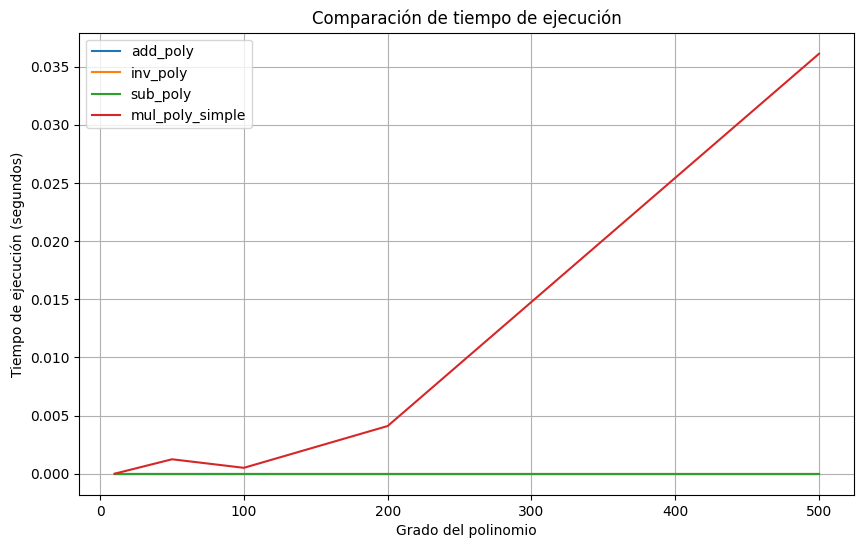

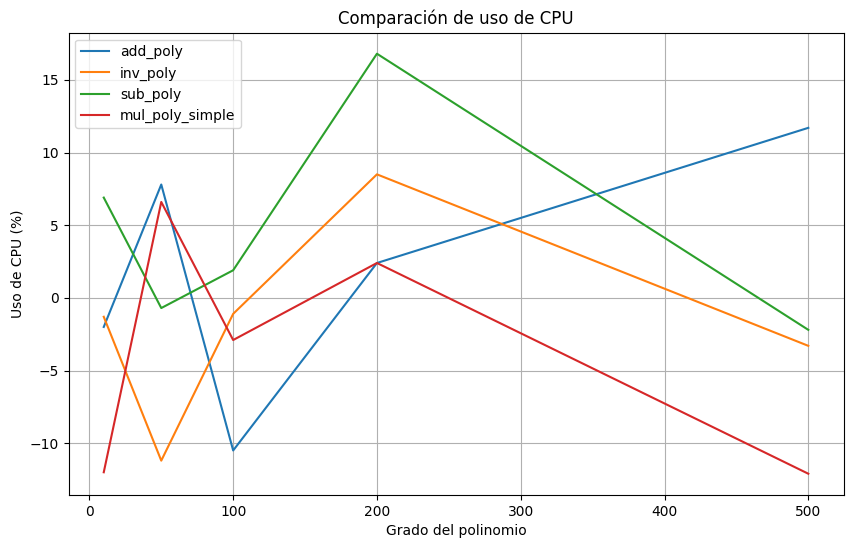

In [ ]:
# Gráfica de tiempo de ejecución
plt.figure(figsize=(10, 6))
for key, values in results_time.items():
    plt.plot(degrees, values, label=key)
plt.xlabel("Grado del polinomio")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Comparación de tiempo de ejecución")
plt.legend()
plt.grid()
plt.show()

# Gráfica de uso de CPU
plt.figure(figsize=(10, 6))
for key, values in results_cpu.items():
    plt.plot(degrees, values, label=key)
plt.xlabel("Grado del polinomio")
plt.ylabel("Uso de CPU (%)")
plt.title("Comparación de uso de CPU")
plt.legend()
plt.grid()
plt.show()




In [ ]:
import time

def brute_force_seed_attack(alice_pk, max_seed_value=1000):
    """Simula un ataque de fuerza bruta para adivinar la semilla de Alice."""
    target_seed, target_t = alice_pk
    start_time = time.time()

    for seed_guess in range(max_seed_value):
        # Intentar generar la matriz A con la semilla adivinada
        A_guess = gen_matrix_A(seed_guess, k=2, degree_f=4, q=3329)

        # Verificar si la semilla adivinada coincide con la semilla real
        if seed_guess == target_seed:
            print(f"¡Semilla adivinada correctamente! Semilla: {seed_guess}")
            break
    else:
        print(f"No se encontró la semilla en el rango 0-{max_seed_value}.")

    end_time = time.time()
    print(f"Tiempo de ejecución: {end_time - start_time} segundos")

# Ejemplo de uso
alice = KyberAlice()
alice_pk = alice.get_public_key()
brute_force_seed_attack(alice_pk, max_seed_value=1000)

No se encontró la semilla en el rango 0-1000.
Tiempo de ejecución: 0.019065141677856445 segundos


No se encontró la semilla en el rango 0-100.
Tiempo de ejecución: 0.002019166946411133 segundos
No se encontró la semilla en el rango 0-500.
Tiempo de ejecución: 0.00799107551574707 segundos
No se encontró la semilla en el rango 0-1000.
Tiempo de ejecución: 0.013096332550048828 segundos
No se encontró la semilla en el rango 0-5000.
Tiempo de ejecución: 0.058110713958740234 segundos
No se encontró la semilla en el rango 0-10000.
Tiempo de ejecución: 0.126112699508667 segundos


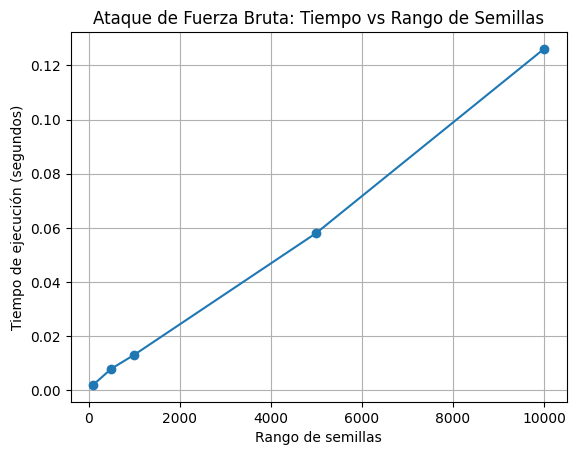

In [ ]:
import matplotlib.pyplot as plt

# Medir el tiempo para diferentes rangos de semillas
seed_ranges = [100, 500, 1000, 5000, 10000]
times = []

for max_seed in seed_ranges:
    start_time = time.time()
    brute_force_seed_attack(alice_pk, max_seed_value=max_seed)
    end_time = time.time()
    times.append(end_time - start_time)

# Graficar
plt.plot(seed_ranges, times, marker='o')
plt.xlabel("Rango de semillas")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Ataque de Fuerza Bruta: Tiempo vs Rango de Semillas")
plt.grid()
plt.show()

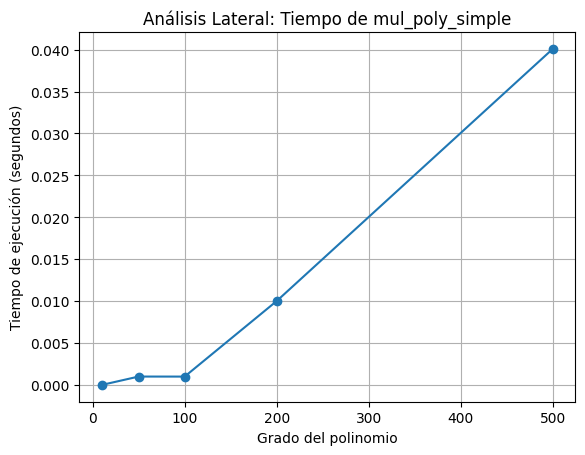

In [ ]:
def measure_mul_poly_time(degree_f, q=3329):
    """Mide el tiempo de ejecución de mul_poly_simple para un grado dado."""
    a = [random.randint(0, q-1) for _ in range(degree_f)]
    b = [random.randint(0, q-1) for _ in range(degree_f)]
    f = [1] + [0] * (degree_f-1) + [1]  # Polinomio f = X^degree_f + 1

    start_time = time.time()
    mul_poly_simple(a, b, f, q)
    end_time = time.time()
    return end_time - start_time

# Medir tiempos para diferentes grados
degrees = [10, 50, 100, 200, 500]
times = []

for degree in degrees:
    times.append(measure_mul_poly_time(degree))

# Graficar
plt.plot(degrees, times, marker='o')
plt.xlabel("Grado del polinomio")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Análisis Lateral: Tiempo de mul_poly_simple")
plt.grid()
plt.show()

## Funciones de Análisis y Visualización

Esta sección contiene las funciones que realizan los análisis específicos de Kyber y generan las visualizaciones (gráficos).  Cada función se centra en un aspecto particular del algoritmo.

**Funciones:**

1.  **`analyze_coefficient_distribution(poly, title)`:**
    *   **Propósito:** Analizar la distribución de los valores de los coeficientes de un polinomio dado.  Esto es útil para verificar si los coeficientes se distribuyen de manera uniforme (como se esperaría en un esquema criptográfico seguro).
    *   **Entrada:**
        *   `poly`: Una lista (o lista de listas) que representa los coeficientes del polinomio.
        *   `title`: Un título opcional para el gráfico.
    *   **Funcionamiento:**
        *   Aplane la lista de coeficientes (en caso de que sea una lista de listas) usando `np.array(poly).flatten()`.
        *   Genera un histograma de los coeficientes usando `matplotlib.pyplot.hist()`.
        *   Calcula y muestra la media (`np.mean()`) y la desviación estándar (`np.std()`) de los coeficientes.
    *   **Salida:** Un histograma y estadísticas (media y desviación estándar).

2.  **`analyze_error_distribution(eta, num_samples)`:**
    *   **Propósito:** Analizar la distribución de los valores generados por la Distribución Binomial Centrada (CBD), que se utiliza para introducir el "ruido" en Kyber.
    *   **Entrada:**
        *   `eta`: El parámetro eta de la CBD.
        *   `num_samples`: El número de muestras a generar para el análisis.
    *   **Funcionamiento:**
        *   Genera `num_samples` muestras de la CBD usando la función `sample_cbd(eta)`.
        *   Genera un histograma de las muestras.
        *   Calcula y muestra la media, la desviación estándar y los valores únicos de las muestras.
    *   **Salida:** Un histograma y estadísticas.

3.  **`analyze_key_agreement_success_rate(num_trials, k, degree_f, q, eta1, eta2, message)`:**
    *   **Propósito:** Evaluar la fiabilidad del intercambio de claves Kyber.  Mide la frecuencia con la que Alice y Bob llegan a la *misma* clave compartida.
    *   **Entrada:** Los parámetros de Kyber (k, degree_f, q, eta1, eta2), el número de intentos (`num_trials`) y un mensaje opcional.
    *   **Funcionamiento:**
        *   Simula `num_trials` intercambios de claves completos.
        *   Para cada intercambio:
            *   Genera claves para Alice y Bob.
            *   Bob encripta un mensaje (ya sea el proporcionado o uno aleatorio).
            *   Alice desencripta el mensaje.
            *   Compara las claves compartidas de Alice y Bob.
            *   Lleva un conteo de los intercambios exitosos (donde las claves coinciden).
        *   Calcula y muestra la tasa de éxito (porcentaje de coincidencias).
        *   Genera un gráfico de barras que muestra el número de éxitos y fallos.
    *   **Salida:** Tasa de éxito y un gráfico de barras.

4.  **`analyze_computation_time(num_trials, k, degree_f, q, eta1, eta2, message)`:**
    *   **Propósito:** Medir el tiempo que tardan las diferentes etapas del intercambio de claves Kyber (generación de claves de Alice, encriptación de Bob, desencriptación de Alice).
    *   **Entrada:**  Los parámetros de Kyber, el número de intentos y un mensaje opcional.
    *   **Funcionamiento:**
        *   Simula `num_trials` intercambios de claves.
        *   Para cada intercambio, mide el tiempo de cada etapa usando `time.time()`.
        *   Calcula y muestra el tiempo promedio de cada etapa.
        *   Genera un gráfico de barras que compara los tiempos promedio de las diferentes etapas.
    *   **Salida:** Tiempos promedio y un gráfico de barras.

5.  **`analyze_message_recovery(num_trials, k, degree_f, q, eta1, eta2, message_length)`:**
    *   **Propósito:**  Evaluar la *corrección* de la recuperación del mensaje.  A diferencia de `analyze_key_agreement_success_rate`, que verifica la coincidencia de las *claves* (hashes), esta función verifica si los *bits del mensaje* recuperados por Alice coinciden con los bits originales enviados por Bob.
    *   **Entrada:** Los parámetros de Kyber y la longitud del mensaje a generar (`message_length`).
    *   **Funcionamiento:**
        *   Simula `num_trials` intercambios de claves.
        *   Para cada intercambio:
            *   Genera un mensaje *aleatorio* de la longitud especificada.
            *   Bob encripta el mensaje.
            *   Alice desencripta el mensaje.
            *   Compara los *bits* recuperados por Alice con los *bits originales* de Bob.
            *   Cuenta el número de bits incorrectos.
        *   Calcula y muestra la tasa de recuperación correcta (porcentaje de veces que *todos* los bits coinciden).
        *   Calcula y muestra el promedio de bits incorrectos por intento.
        *   Genera un histograma que muestra la distribución del número de bits incorrectos.
    *   **Salida:**  Tasa de recuperación correcta, promedio de bits incorrectos y un histograma.


In [ ]:


def analyze_coefficient_distribution(poly, title="Distribución de Coeficientes"):
    """Analiza y grafica la distribución de los coeficientes de un polinomio."""
    coefficients = np.array(poly).flatten()  # Aplanar en caso de que sea una lista de listas
    plt.figure(figsize=(8, 6))
    plt.hist(coefficients, bins=30, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel("Valor del Coeficiente")
    plt.ylabel("Frecuencia")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    mean = np.mean(coefficients)
    std_dev = np.std(coefficients)
    print(f"  Media: {mean:.2f}")
    print(f"  Desviación Estándar: {std_dev:.2f}")


def analyze_error_distribution(eta, num_samples=10000):
    """Analiza y grafica la distribución de error (CBD)."""
    samples = [sample_cbd(eta) for _ in range(num_samples)]
    plt.figure(figsize=(8, 6))
    plt.hist(samples, bins=30, color='lightgreen', edgecolor='black')
    plt.title(f"Distribución de Error (CBD, eta={eta})")
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    mean = np.mean(samples)
    std_dev = np.std(samples)
    print(f"  Media: {mean:.2f}")
    print(f"  Desviación Estándar: {std_dev:.2f}")
    print(f"  Valores Únicos: {np.unique(samples)}")


def analyze_key_agreement_success_rate(num_trials=100, k=2, degree_f=256, q=3329, eta1=3, eta2=2, message=None):
    """Analiza la tasa de éxito del intercambio de claves."""
    success_count = 0
    for _ in range(num_trials):
        alice_seed = random.randint(0, 2**32 - 1)
        bob_seed = random.randint(0, 2**32 - 1)
        alice = KyberAlice(seed=alice_seed, k=k, degree_f=degree_f, q=q, eta1=eta1, eta2=eta2)
        bob = KyberBob(k=k, degree_f=degree_f, q=q, eta1=eta1, eta2=eta2, seed=bob_seed)
        ciphertext, bob_shared_key, _ = bob.encrypt_and_compute_key(alice.get_public_key(), message=message)
        alice_shared_key, _ = alice.decrypt_and_compute_key(ciphertext)
        if alice_shared_key == bob_shared_key:
            success_count += 1

    success_rate = (success_count / num_trials) * 100
    print(f"Tasa de Éxito del Intercambio de Claves: {success_rate:.2f}% ({success_count}/{num_trials})")

     # Gráfico de barras simple
    plt.figure(figsize=(6, 4))
    plt.bar(["Éxito", "Fallo"], [success_count, num_trials - success_count], color=['green', 'red'])
    plt.title("Resultados del Intercambio de Claves")
    plt.ylabel("Número de Intentos")
    plt.show()



def analyze_computation_time(num_trials=10, k=2, degree_f=256, q=3329, eta1=3, eta2=2, message=None):
    """Analiza el tiempo de cómputo de las diferentes etapas."""
    alice_key_gen_times = []
    bob_encrypt_times = []
    alice_decrypt_times = []

    for _ in range(num_trials):
        alice_seed = random.randint(0, 2**32 - 1)
        bob_seed = random.randint(0, 2**32 - 1)

        # Alice: Generación de claves
        start_time = time.time()
        alice = KyberAlice(seed=alice_seed, k=k, degree_f=degree_f, q=q, eta1=eta1, eta2=eta2)
        end_time = time.time()
        alice_key_gen_times.append(end_time - start_time)

        # Bob: Encriptación y cálculo de clave
        start_time = time.time()
        bob = KyberBob(k=k, degree_f=degree_f, q=q, eta1=eta1, eta2=eta2, seed=bob_seed)

        ciphertext, bob_shared_key, _ = bob.encrypt_and_compute_key(alice.get_public_key(), message=message)
        end_time = time.time()
        bob_encrypt_times.append(end_time - start_time)

        # Alice: Desencriptación y cálculo de clave
        start_time = time.time()
        alice_shared_key, _ = alice.decrypt_and_compute_key(ciphertext)
        end_time = time.time()
        alice_decrypt_times.append(end_time - start_time)

    # Calcular estadísticas
    avg_alice_key_gen = np.mean(alice_key_gen_times)
    avg_bob_encrypt = np.mean(bob_encrypt_times)
    avg_alice_decrypt = np.mean(alice_decrypt_times)

    print(f"Tiempo promedio de generación de claves (Alice): {avg_alice_key_gen:.4f} segundos")
    print(f"Tiempo promedio de encriptación (Bob): {avg_bob_encrypt:.4f} segundos")
    print(f"Tiempo promedio de desencriptación (Alice): {avg_alice_decrypt:.4f} segundos")

    # Gráfico de barras
    labels = ['Generación de Claves (Alice)', 'Encriptación (Bob)', 'Desencriptación (Alice)']
    times = [avg_alice_key_gen, avg_bob_encrypt, avg_alice_decrypt]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, times, color=['blue', 'orange', 'green'])
    plt.title("Tiempos de Cómputo de las Etapas de Kyber")
    plt.ylabel("Tiempo Promedio (segundos)")
    plt.show()


def analyze_message_recovery(num_trials=100, k=2, degree_f=256, q=3329, eta1=3, eta2=2, message_length=16):
    """
    Analiza la tasa de recuperación correcta del mensaje (en bits) después de la desencriptación.
    """
    correct_recovery_count = 0
    bit_error_counts = []  # Lista para almacenar el número de bits incorrectos en cada intento

    for _ in range(num_trials):
        alice_seed = random.randint(0, 2**32 - 1)
        bob_seed = random.randint(0, 2**32 - 1)
        alice = KyberAlice(seed=alice_seed, k=k, degree_f=degree_f, q=q, eta1=eta1, eta2=eta2)
        bob = KyberBob(k=k, degree_f=degree_f, q=q, eta1=eta1, eta2=eta2, seed=bob_seed)


        message = ''.join(random.choice(string.ascii_letters + string.digits) for _ in range(message_length))

        ciphertext, _, bob_m_b = bob.encrypt_and_compute_key(alice.get_public_key(), message=message)
        _, alice_recovered_bits = alice.decrypt_and_compute_key(ciphertext)

        # Comparar los bits recuperados con los bits originales de Bob
        num_bit_errors = sum(b1 != b2 for b1, b2 in zip(bob_m_b, alice_recovered_bits)) # suma el par de tuplas  de  lo que manda bobo y lo que desencripta alice y mira si  son iguales
        bit_error_counts.append(num_bit_errors) #Contador de los errores

        if num_bit_errors == 0:
            correct_recovery_count += 1

    recovery_rate = (correct_recovery_count / num_trials) * 100
    avg_bit_errors = np.mean(bit_error_counts)
    print(f"Tasa de Recuperación Correcta del Mensaje: {recovery_rate:.2f}% ({correct_recovery_count}/{num_trials})")
    print(f"Promedio de Bits Incorrectos: {avg_bit_errors:.2f}")

    # Histograma de la cantidad de errores por bit
    plt.figure(figsize=(8, 6))
    plt.hist(bit_error_counts, bins=range(min(bit_error_counts), max(bit_error_counts) + 2), color='coral', edgecolor='black')
    plt.title("Distribución de Errores de Bits en la Recuperación del Mensaje")
    plt.xlabel("Número de Bits Incorrectos")
    plt.ylabel("Frecuencia")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

## Menú Principal y Lógica de Control

La función `main()` proporciona un menú interactivo para analizar diferentes aspectos de la implementación de Kyber.  Este menú permite al usuario elegir entre varias opciones de análisis, configurar los parámetros necesarios y ver los resultados.

**Opciones del Menú:**

1.  **Analizar distribución de coeficientes de un polinomio aleatorio:**
    *   **¿Qué hace?** Genera un polinomio aleatorio con un grado y un módulo especificados por el usuario, y luego analiza la distribución de los valores de sus coeficientes.
    *   **¿Para qué sirve?**  Permite inspeccionar la distribución de los coeficientes de los polinomios utilizados en Kyber.  En una implementación segura, estos coeficientes deberían parecer aleatorios (dentro del módulo `q`).
    *   **Función de análisis llamada:** `analyze_coefficient_distribution(poly, title)`
    *   **Librerías externas:**
        *   `random`:  Para generar el polinomio aleatorio (`random.randint`). ** aunque en clase se recomendó usar  numeros aleatorías de librerías cripto, para este ejemplo está bien usar random
        
        *   `numpy`: Para calcular la media y la desviación estándar de los coeficientes (`np.mean`, `np.std`).
        *   `matplotlib.pyplot`: Para generar el histograma de la distribución (`plt.hist`, `plt.show`).

2.  **Analizar distribución de error (CBD):**
    *   **¿Qué hace?** Genera muestras de la Distribución Binomial Centrada (CBD) con un parámetro `eta` especificado por el usuario, y analiza la distribución de los valores resultantes.
    *   **¿Para qué sirve?**  Permite visualizar la forma de la distribución de error utilizada en Kyber.  La CBD es crucial para la seguridad del algoritmo.
    *   **Función de análisis llamada:** `analyze_error_distribution(eta, num_samples)`
    *   **Librerías externas:**
        *   `numpy`: Para calcular la media, la desviación estándar y los valores únicos (`np.mean`, `np.std`, `np.unique`).
        *   `matplotlib.pyplot`: Para generar el histograma (`plt.hist`, `plt.show`).

3.  **Analizar tasa de éxito del intercambio de claves:**
    *   **¿Qué hace?** Simula múltiples intercambios de claves Kyber y calcula el porcentaje de veces que Alice y Bob llegan a la *misma* clave compartida.
    *   **¿Para qué sirve?**  Evalúa la fiabilidad del intercambio de claves.  En una implementación correcta, la tasa de éxito debería ser muy cercana al 100%.
    *   **Función de análisis llamada:** `analyze_key_agreement_success_rate(num_trials, k, degree_f, q, eta1, eta2, message)`
    *   **Librerías externas:**
        *   `random`: Para generar semillas aleatorias para Alice y Bob (`random.randint`).
        *   `matplotlib.pyplot`: Para generar el gráfico de barras de éxitos y fallos (`plt.bar`, `plt.show`).

4.  **Analizar tiempos de cómputo:**
    *   **¿Qué hace?** Mide el tiempo que tardan las diferentes etapas del intercambio de claves Kyber (generación de claves de Alice, encriptación de Bob, desencriptación de Alice).
    *   **¿Para qué sirve?**  Permite evaluar la eficiencia de la implementación.
    *   **Función de análisis llamada:** `analyze_computation_time(num_trials, k, degree_f, q, eta1, eta2, message)`
    *   **Librerías externas:**
        *   `time`: Para medir el tiempo transcurrido (`time.time`).
        *   `numpy`: Para calcular el tiempo promedio (`np.mean`).
        *   `matplotlib.pyplot`: Para generar el gráfico de barras que compara los tiempos (`plt.bar`, `plt.show`).

5.  **Analizar recuperación del mensaje:**
    *   **¿Qué hace?** Simula múltiples intercambios de claves, generando mensajes aleatorios de una longitud especificada.  Luego, verifica si los *bits* del mensaje recuperados por Alice coinciden *exactamente* con los bits originales enviados por Bob.
    *   **¿Para qué sirve?**  Evalúa la *corrección* de la recuperación del mensaje a nivel de bit.  Esto es más estricto que simplemente verificar la coincidencia de las claves compartidas (hashes).
    *   **Función de análisis llamada:** `analyze_message_recovery(num_trials, k, degree_f, q, eta1, eta2, message_length)`
    *   **Librerías externas:**
        *   `random`: Para generar semillas aleatorias y mensajes aleatorios (`random.randint`, `random.choice`).
        *    `string` : Para usar caracteres y digitos para crear los mensajes aleatorios.
        *   `numpy`: Para calcular el promedio de bits incorrectos (`np.mean`).
        *   `matplotlib.pyplot`: Para generar el histograma de la distribución de errores de bits (`plt.hist`, `plt.show`).

6.  **Salir:**
    *   **¿Qué hace?** Termina la ejecución del programa.

**Flujo General:**

El programa presenta el menú, solicita la entrada del usuario (opción y parámetros), y luego llama a la función de análisis correspondiente.  Las funciones de análisis, a su vez, utilizan funciones de librerías externas (principalmente `random`, `numpy` y `matplotlib.pyplot`) para generar datos, realizar cálculos y crear visualizaciones.

ANÁLISIS DE KYBER

Opciones:
1. Analizar distribución de coeficientes de un polinomio aleatorio
2. Analizar distribución de error (CBD)
3. Analizar tasa de éxito del intercambio de claves
4. Analizar tiempos de cómputo
5. Analizar recuperación del mensaje
6. Salir


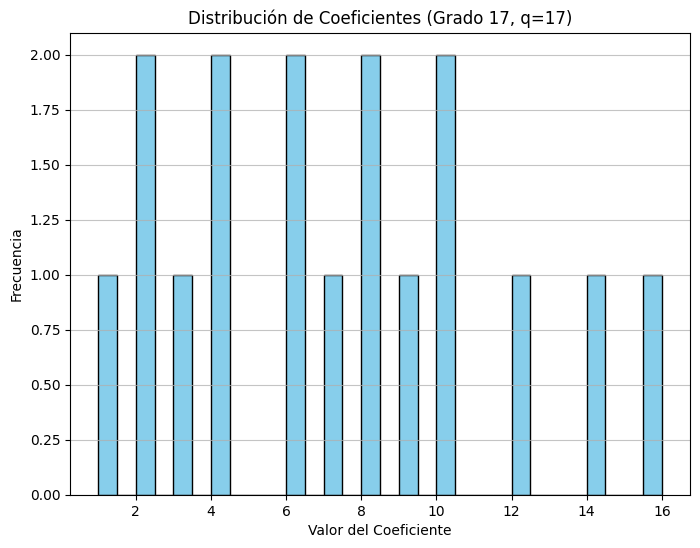

  Media: 7.18
  Desviación Estándar: 4.20

Opciones:
1. Analizar distribución de coeficientes de un polinomio aleatorio
2. Analizar distribución de error (CBD)
3. Analizar tasa de éxito del intercambio de claves
4. Analizar tiempos de cómputo
5. Analizar recuperación del mensaje
6. Salir


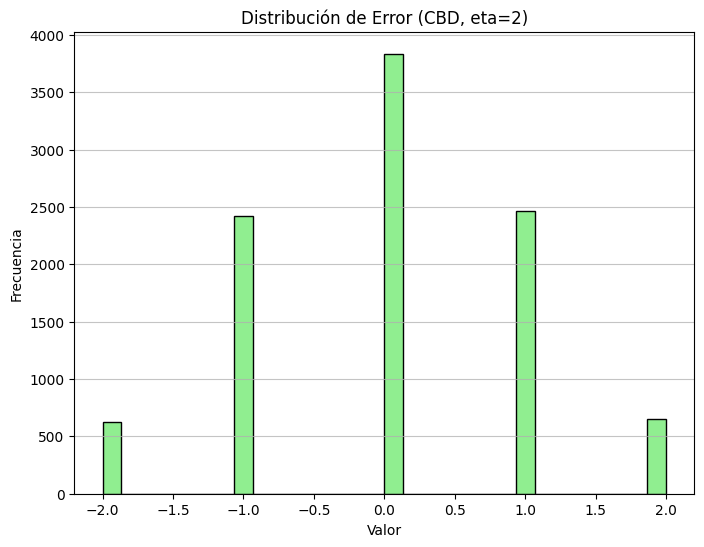

  Media: 0.01
  Desviación Estándar: 1.00
  Valores Únicos: [-2 -1  0  1  2]

Opciones:
1. Analizar distribución de coeficientes de un polinomio aleatorio
2. Analizar distribución de error (CBD)
3. Analizar tasa de éxito del intercambio de claves
4. Analizar tiempos de cómputo
5. Analizar recuperación del mensaje
6. Salir


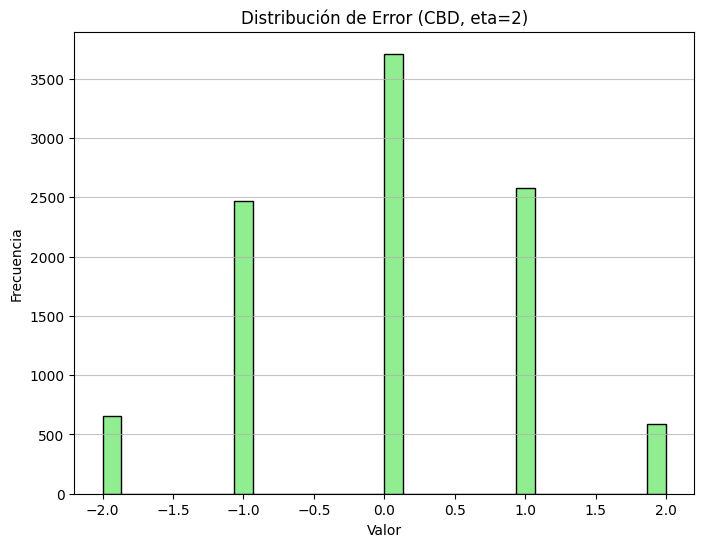

  Media: -0.00
  Desviación Estándar: 1.00
  Valores Únicos: [-2 -1  0  1  2]

Opciones:
1. Analizar distribución de coeficientes de un polinomio aleatorio
2. Analizar distribución de error (CBD)
3. Analizar tasa de éxito del intercambio de claves
4. Analizar tiempos de cómputo
5. Analizar recuperación del mensaje
6. Salir


In [ ]:
# ---  Menú Principal y Llamadas a las Funciones de Análisis ---

def main():
    print("ANÁLISIS DE KYBER")

    while True:
        print("\nOpciones:")
        print("1. Analizar distribución de coeficientes de un polinomio aleatorio")
        print("2. Analizar distribución de error (CBD)")
        print("3. Analizar tasa de éxito del intercambio de claves")
        print("4. Analizar tiempos de cómputo")
        print("5. Analizar recuperación del mensaje")  # Nueva opción
        print("6. Salir")

        choice = input("\nSeleccione una opción (1-6): ")

        if choice == '1':
            degree_f = int(input("Ingrese el grado del polinomio: "))
            q = int(input("Ingrese el módulo (q): "))
            poly = [random.randint(0, q - 1) for _ in range(degree_f)]
            analyze_coefficient_distribution(poly, title=f"Distribución de Coeficientes (Grado {degree_f}, q={q})")

        elif choice == '2':
            eta = int(input("Ingrese el parámetro eta para la CBD: "))
            analyze_error_distribution(eta)

        elif choice == '3':
            num_trials = int(input("Ingrese el número de intentos: "))
            k = int(input("Ingrese el valor de k: "))
            degree_f = int(input("Ingrese el valor de degree_f: "))
            q = int(input("Ingrese el valor de q: "))
            eta1 = int(input("Ingrese el valor de eta1: "))
            eta2 = int(input("Ingrese el valor de eta2: "))
            message = input("Ingrese el mensaje secreto (opcional, presione Enter para aleatorio): ")
            if not message:
              message = None
            analyze_key_agreement_success_rate(num_trials, k, degree_f, q, eta1, eta2, message)

        elif choice == '4':
            num_trials = int(input("Ingrese el número de intentos: "))
            k = int(input("Ingrese el valor de k: "))
            degree_f = int(input("Ingrese el valor de degree_f: "))
            q = int(input("Ingrese el valor de q: "))
            eta1 = int(input("Ingrese el valor de eta1: "))
            eta2 = int(input("Ingrese el valor de eta2: "))
            message = input("Ingrese el mensaje secreto (opcional, presione Enter para aleatorio): ")
            if not message:
                message = None
            analyze_computation_time(num_trials, k, degree_f, q, eta1, eta2, message)


        elif choice == '5':
            num_trials = int(input("Ingrese el número de intentos: "))
            k = int(input("Ingrese el valor de k: "))
            degree_f = int(input("Ingrese el valor de degree_f: "))
            q = int(input("Ingrese el valor de q: "))
            eta1 = int(input("Ingrese el valor de eta1: "))
            eta2 = int(input("Ingrese el valor de eta2: "))
            message_length = int(len(input("Ingrese la longitud del mensaje aleatorio (en caracteres): ")))
            analyze_message_recovery(num_trials, k, degree_f, q, eta1, eta2, message_length)

        elif choice == '6':
            break
        else:
            print("\nOpción no válida. Intente de nuevo.")

if __name__ == "__main__":
    main()